# The impact of baryons on the internal structure of dark matter haloes

# imports

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import imageio
import os

# the NFW profile 

$$ \frac{\rho(r)}{\rho_c}=\frac{\Delta_c}{\frac{r}{r_s}\left(1+\frac{r}{r_s}\right)^2} \tag{1}$$

$$ \frac{\rho(r)}{\rho_c}=\frac{\Delta_c}{c\frac{r}{r_{200c}}\left(1+c\frac{r}{r_{200c}}\right)^2} \tag{2}$$

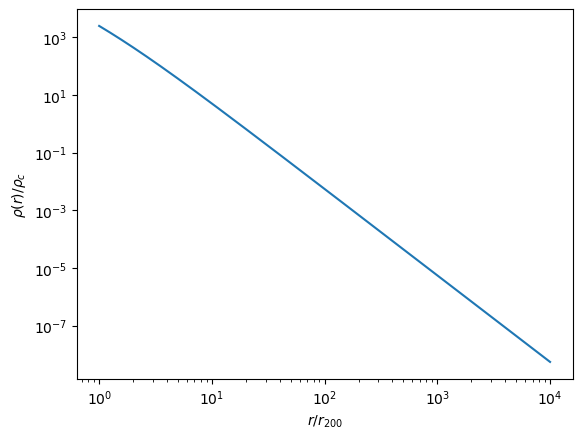

In [6]:
def delta_c(c):
    return (200 / 3) * (c**3) / (np.log(1 + c) - (c / (1 + c)))

delta_c = delta_c(10)

def nfw_profile(r, c, r200):
    x = r/r200
    return delta_c/(c*x*(1+c*x)**2)

rho_c = 1.88e-26 # kg/m^3
r200 = 100
c = 200
r = np.logspace(-2, 2, 1000) * r200
plt.loglog(r, nfw_profile(r, c, r200))
plt.ylabel(r'$\rho(r)/\rho_c$')
plt.xlabel(r'$r/r_{200}$')
plt.show()

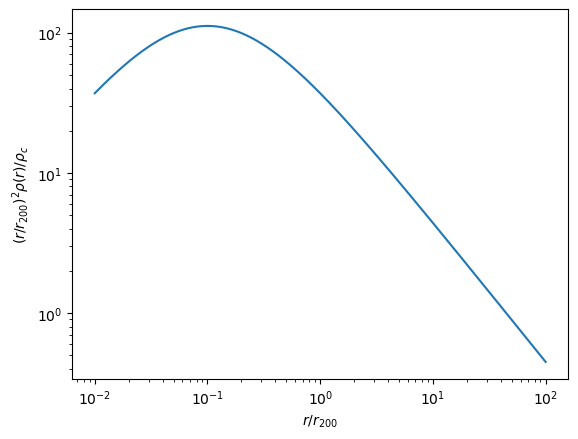

In [30]:
r200 = 1
c = 10
r = np.logspace(-2, 2, 1000)
plt.loglog(r, (r/r200)**2*nfw_profile(r, c, r200))
plt.ylabel(r'$(r/r_{200})^2\rho(r)/\rho_c$')
plt.xlabel(r'$r/r_{200}$')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


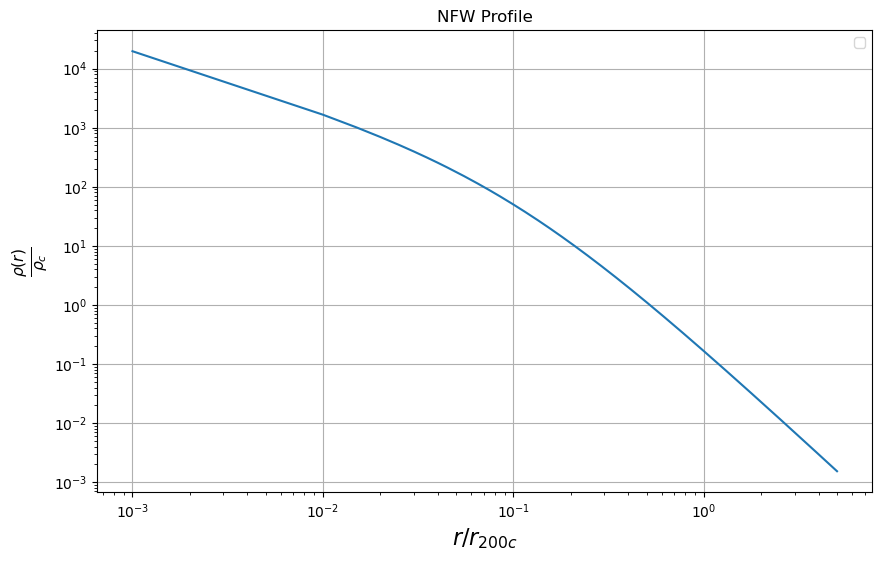

In [27]:
# Define parameters
Delta_c = 200  # Example value, change based on your model or data
c = 10         # Concentration parameter, typical value for dark matter halos
r_200c = 200   #kpc

# Define the radial distance range from the center of the halo
r = np.linspace(1, 1e3, 1000)  # From 0 to 2*r_200c, 500 points

# Avoid division by zero at r = 0 by setting the first element to a small value
r[0] = r[1] / 10

# Calculate the density ratio rho(r) / rho_c
density_ratio = Delta_c / (c * (r / r_200c) * (1 + c * (r / r_200c))**2)

# delta_c_c = 200
# c_c = 10
# r_200c_c = 400
# compare_ratio = delta_c_c / (c_c * (r / r_200c_c) * (1 + c_c * (r / r_200c_c))**2)

# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(r/r_200c, density_ratio)
plt.xlabel(r'$r / r_{200c}$', fontsize=16)
plt.ylabel(r'$\frac{\rho(r)}{\rho_c}$', fontsize=16)
plt.title('NFW Profile')
plt.legend()
plt.grid(True)
plt.show()

# Gif doe NFW profile

In [5]:
# Parameter ranges
Delta_c_values = np.linspace(100, 500, 5)  # Example range for Delta_c
c_values = np.linspace(2, 30, 5)           # Example range for c
r_200c_values = np.linspace(100, 500, 5)   # Example range for r_200c

# Define the radial distance range
r = np.linspace(0, 1e3, 500)
r[0] = r[1] / 10  # Avoid division by zero

filenames = []

# Loop over parameters
for Delta_c in Delta_c_values:
    for c in c_values:
        for r_200c in r_200c_values:
            # Calculate the density ratio
            density_ratio = Delta_c / (c * (r / r_200c) * (1 + c * (r / r_200c))**2)
            
            # Plotting
            plt.figure(figsize=(10, 6))
            plt.loglog(r, density_ratio, label=f'$\Delta_c={Delta_c:.1f}, c={c:.1f}, r_{{200c}}={r_200c:.1f}$ kpc')
            plt.xlabel('Radius r (kpc)', fontsize=14)
            plt.ylabel(r'$\frac{\rho(r)}{\rho_c}$', fontsize=14)
            plt.ylim(1e-2, 1e5)
            plt.title('NFW Profile')
            plt.legend(loc='upper right', fontsize=18)
            plt.grid(True)
            
            # Save the plot as an image file
            filename = f'plots/plot_{Delta_c}_{c}_{r_200c}.png'
            plt.savefig(filename)
            plt.close()
            filenames.append(filename)

# Create a GIF
with imageio.get_writer('nfw_profile.gif', mode='I', duration=0.5) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        # Remove files if you want to clean up
        os.remove(filename)

# Display the path to the GIF
print("GIF created: 'nfw_profile.gif'")

/var/folders/71/rd8s6g0x52sd1l6wnf9_z6_r0000gn/T/ipykernel_90046/2320164208.py:38: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF created: 'nfw_profile.gif'
